In [28]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pickle as pkl

# LOADING FILES

In [29]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]   #ALL SKY POINT SOURCES

In [30]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)
#FIRST LOAD THE DATA IC40,THEN LOAD OTHER DATA AND APPEND WITH IC40   

1134431

In [31]:
fields=[log10_E,RA,Dec,Ang_err]
print(Dec)
iceang=fields[3]
#EXTRACT THE COLUMN

[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]


In [32]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [132]:
df=pd.read_csv("TabO1.csv") #MAGNETARS DATA
#print(df)
df.loc[31, 'RA'] = '08 43 00.0'
df.loc[31, 'Decl'] = '+73 30 00'
df.loc[32, 'RA'] = '00 47 30.0'
df.loc[32, 'Decl'] = '-25 11 37 '
df.loc[33,'RA']='09 52 34.1'
df.loc[33,'Decl']='+68 50 42'
df.loc[34,'RA']='00 44 18.0'
df.loc[34,'Decl']='+42 18 00'
df.loc[35,'RA']='13 42 06.24'
df.loc[35,'Decl']='-26 53 48.1'
df.loc[36,'RA']='00 49 12.0 '
df.loc[36,'Decl']='26 06 00  '

df.to_csv("updated_file.csv", index=False) #ADD REFEREE MENTIONED MAGNETARS TO THE CURRENT DATA SET
#print(df)

#df.loc[1, 'RA'] = '09 55 59.28'
#df.loc[1, 'Decl'] = '+69 41 02.40'


In [133]:
df1=df.rename({'RA':'RA_M'},axis=1)
#print(df1)

In [134]:
import re
def convert_ra_to_comma(ra):#replacing space with comma
    return re.sub(r"\s+", ",",ra.strip())
df1['RA_M_comma'] = df1['RA_M'].apply(convert_ra_to_comma)# Apply the function to the entire RA_M column
def convert_dec_to_comma(dec):
    return re.sub(r"\s+", ",",dec.strip())
df1['dec_M_comma'] = df1['Decl'].apply(convert_dec_to_comma)
    
#print(df1[['Name', 'RA_M', 'RA_M_comma', 'Decl','dec_M_comma']])# Show the DataFrame with the new RA_M_Comma column

In [135]:
def ra_to_degrees(ra_string):
    ra_parts = ra_string.split(',')
    ra_hours = int(ra_parts[0])  # Convert to integer (handles leading zeros)
    ra_minutes = int(ra_parts[1])  # Convert to integer (handles leading zeros)
    ra_seconds = float(ra_parts[2])  # Convert to float
    return (ra_hours * 15) + (ra_minutes / 4) + (ra_seconds / 240)
#field3.loc[:,'RA_M(deg)']=field3['RA_M_comma'].apply(ra_to_degrees)
def dec_to_degrees(dec_string):
    dec_parts = dec_string.split(',')
    dec_degrees = int(dec_parts[0])  # Convert to integer (handles leading zeros)
    dec_minutes = int(dec_parts[1])  # Convert to integer (handles leading zeros)
    dec_seconds = float(dec_parts[2])
    sign = 1 if dec_degrees >= 0 else -1
    return abs(dec_degrees) + (dec_minutes / 60) + (dec_seconds / 3600) * sign
df1['RA_M(deg)'] = df1['RA_M_comma'].apply(ra_to_degrees)
df1['Decl_M(deg)'] = df1['dec_M_comma'].apply(dec_to_degrees)
#print(df1)

In [136]:
df1.at[32, 'Decl_M(deg)'] =- 25.02
df1.at[15, 'Decl_M(deg)'] = 16.11
df1.at[35, 'Decl_M(deg)'] =- 26.87 
df1.at[36, 'Decl_M(deg)'] = -26.10
field3 = df1[['RA_M(deg)', 'Decl_M(deg)']]
#print(field3)


In [38]:
ra_mag=np.array(field3['RA_M(deg)'])
dec_mag=np.array(field3['Decl_M(deg)'])
ice_ra=(fields[1])
ice_dec=(fields[2])
print(ice_ra)
print(ice_dec)
print(ra_mag)
#print(dec_mag)|
print(dec_mag)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[ 15.17975     26.5933625   64.6411125   75.27816667  81.50370833
 162.52975    237.72551608 245.68704167 248.96601667 251.7925
 257.19529167 258.52391667 266.41735    272.16390417 272.46286233
 274.51541667 275.575      278.434875   278.71715833 280.33059583
 283.19445833 286.80970833 293.7316575  345.2845625  118.927
 270.24583333 272.04666667 274.71408333 281.22783333 303.48708333
 281.60391667 130.75        11.875      148.14208333  11.075
 205.526       12.3       ]
[ 72.17394444  61.75088611  57.53969722  45.27608889  66.05658333
  59.87738889  54.29330164  49.81869444  47.57685833  45.86197222
  40.11876667  38.15808333  28.99171722  20.38893056  19.70224125
  16.11        16.05922222   8.51458333   8.73443889   4.93023333
   0.55494444   9.32225     21.89660733  58.87901389  29.53633333
  22.92        20.61972222  15.97705      2.91858333  34.33
   2.95830556  73.5       

# INTEGRAL OF AREA*DF/DE

In [39]:
column_namesarea = ["log10(E_nu/GeV)_min", "log10(E_nu/GeV)_max", "Dec_nu_min[deg]", "Dec_nu_max[deg]", "A_Eff[cm^2]"]
dataarea1= pd.read_csv("IC40_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea2= pd.read_csv("IC59_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea3= pd.read_csv("IC79_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea4= pd.read_csv("IC86_I_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea5= pd.read_csv("IC86_II_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)

In [40]:
gamma=-2.53
Emin1=dataarea1["log10(E_nu/GeV)_min"] #unitless
Emax1=dataarea1["log10(E_nu/GeV)_max"] #unitless
decmin1=dataarea1["Dec_nu_min[deg]"]   #degree
decmax1=dataarea1["Dec_nu_max[deg]"]    #degree
dec1=0.5*(decmin1+decmax1)
effarea1=dataarea1[ "A_Eff[cm^2]"]     #degree
Eff_1=[]
phiE_1=[]
for j in range(0,37):
    mdec=dec_mag[j]
    idx1=np.where((decmin1<=mdec)&(decmax1>mdec))
    log10E1=[0.5*(Emin1[i]+Emax1[i]) for i in idx1]
    A1=[effarea1[i] for i in idx1] #A in cm^2
    E1=pow(10,np.array(log10E1)-5) #10−5GeV
    phiE1=E1**gamma       #GeV
    y1=A1*phiE1               #cm² GeV
    eff1=np.trapz(y1,x=E1)   
    Eff_1.append(eff1)          #10−5cm2GeV
    #phiE_1.append(phiE1)
    #print(phiE1)

In [41]:
#print(Eff_1)
#(phiE_1)

In [42]:
gamma=-2.53
Emin2=dataarea2["log10(E_nu/GeV)_min"]
Emax2=dataarea2["log10(E_nu/GeV)_max"]
decmin2=dataarea2["Dec_nu_min[deg]"]
decmax2=dataarea2["Dec_nu_max[deg]"]
dec2=0.5*(decmin2+decmax2)
effarea2=dataarea2[ "A_Eff[cm^2]"]
Eff_2=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx2=np.where((decmin2<=mdec)&(decmax2>mdec))
    log10E2=[0.5*(Emin2[i]+Emax2[i]) for i in idx2]
    A2=[effarea2[i] for i in idx2] #A in cm^2
    E2=pow(10,np.array(log10E2)-5)
    phiE2=E2**gamma
    y2=A2*phiE2
    eff2=np.trapz(y2,x=E2)
    Eff_2.append(eff2)
print(Eff_2)
print(phiE2)

[array([9340181.52662067]), array([10229945.65922229]), array([10665971.57608409]), array([11269802.87488753]), array([10229945.65922229]), array([10665971.57608409]), array([11166373.3732454]), array([10656946.40728885]), array([11006679.64645741]), array([11269802.87488753]), array([11254290.59084455]), array([11109115.6857582]), array([11691305.77805648]), array([11923666.77731739]), array([11923666.77731739]), array([11994636.63801732]), array([11994636.63801732]), array([12326875.4817617]), array([12326875.4817617]), array([11903772.20806117]), array([11368237.04474474]), array([12095562.59355901]), array([11593709.81384374]), array([10665971.57608409]), array([11691305.77805648]), array([11593709.81384374]), array([11923666.77731739]), array([11994636.63801732]), array([12036430.51953912]), array([11169425.95882318]), array([12036430.51953912]), array([9340181.52662067]), array([105602.32374289]), array([9340181.52662067]), array([11254290.59084455]), array([93030.24680543]), arr

In [43]:
gamma=-2.53
Emin3=dataarea3["log10(E_nu/GeV)_min"]
Emax3=dataarea3["log10(E_nu/GeV)_max"]
decmin3=dataarea3["Dec_nu_min[deg]"]
decmax3=dataarea3["Dec_nu_max[deg]"]
dec3=0.5*(decmin3+decmax3)
effarea3=dataarea3[ "A_Eff[cm^2]"]
Eff_3=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx3=np.where((decmin3<=mdec)&(decmax3>mdec))
    log10E3=[0.5*(Emin3[i]+Emax3[i]) for i in idx3]
    A3=[effarea3[i] for i in idx3] #A in cm^2
    E3=pow(10,np.array(log10E3)-5)
    phiE3=E3**gamma
    y3=A3*phiE3
    eff3=np.trapz(y3,x=E3)
    Eff_3.append(eff3)
    
print(Eff_3)


[array([11780734.50115796]), array([12766202.76005507]), array([13434035.29672661]), array([14364868.38254651]), array([12766202.76005507]), array([13434035.29672661]), array([14057592.02213136]), array([14047706.04071065]), array([14221540.53892313]), array([14364868.38254651]), array([14498990.95105567]), array([14463791.26166035]), array([14515125.50806031]), array([15358142.83807105]), array([15358142.83807105]), array([15363446.0230365]), array([15363446.0230365]), array([15566527.79863111]), array([15566527.79863111]), array([15237716.24000902]), array([14744885.50990121]), array([15378698.47960457]), array([15205876.94947916]), array([13434035.29672661]), array([14515125.50806031]), array([15205876.94947916]), array([15358142.83807105]), array([15363446.0230365]), array([15237968.23907757]), array([14513432.67333997]), array([15237968.23907757]), array([11780734.50115796]), array([173076.44236549]), array([11780734.50115796]), array([14498990.95105567]), array([144336.58716871])

In [44]:
gamma=-2.53
Emin=dataarea4["log10(E_nu/GeV)_min"]
Emax=dataarea4["log10(E_nu/GeV)_max"]
decmin=dataarea4["Dec_nu_min[deg]"]
decmax=dataarea4["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea4[ "A_Eff[cm^2]"]
Eff_4=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**gamma
    y=A*phiE
    eff4=np.trapz(y,x=E)
    Eff_4.append(eff4)
#print (Eff_4)
print(log10E)

[560    2.1
561    2.3
562    2.5
563    2.7
564    2.9
565    3.1
566    3.3
567    3.5
568    3.7
569    3.9
570    4.1
571    4.3
572    4.5
573    4.7
574    4.9
575    5.1
576    5.3
577    5.5
578    5.7
579    5.9
580    6.1
581    6.3
582    6.5
583    6.7
584    6.9
585    7.1
586    7.3
587    7.5
588    7.7
589    7.9
590    8.1
591    8.3
592    8.5
593    8.7
594    8.9
595    9.1
596    9.3
597    9.5
598    9.7
599    9.9
dtype: float64]


In [45]:
gamma=-2.53
Emin=dataarea5["log10(E_nu/GeV)_min"]
Emax=dataarea5["log10(E_nu/GeV)_max"]
decmin=dataarea5["Dec_nu_min[deg]"]
decmax=dataarea5["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea5[ "A_Eff[cm^2]"]
Eff_5=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**gamma
    y=A*phiE
    eff5=np.trapz(y,x=E)
    Eff_5.append(eff5)
   # print(idx)
print (Eff_5)


[array([15179517.57947307]), array([15860741.83382469]), array([16317836.54165214]), array([16766963.54495137]), array([15860741.83382469]), array([16317836.54165214]), array([16783079.72309577]), array([16832905.18910803]), array([16715826.03883107]), array([16766963.54495137]), array([16807972.63847226]), array([16960996.36309858]), array([17269942.78554372]), array([17509271.76194988]), array([17509271.76194988]), array([17380226.98519227]), array([17380226.98519227]), array([17229599.59357484]), array([17229599.59357484]), array([17108896.27166581]), array([16010995.73767465]), array([17217625.66087968]), array([17505025.59084332]), array([16317836.54165214]), array([17269942.78554372]), array([17505025.59084332]), array([17509271.76194988]), array([17380226.98519227]), array([16757590.21957814]), array([16998989.07002765]), array([16757590.21957814]), array([15179517.57947307]), array([142539.1296101]), array([15179517.57947307]), array([16807972.63847226]), array([124813.74190685

In [46]:
#np.vstack([Eff_1,Eff_2,Eff_3,Eff_4,Eff_5])

In [47]:
column_namestime=["MJD_start[days]","MJD_stop[days]"]
datatime1= pd.read_csv("IC40_exp(1).csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime2= pd.read_csv("IC59_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime3= pd.read_csv("IC79_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime4= pd.read_csv("IC86_I_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime5= pd.read_csv("IC86_II_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime6= pd.read_csv("IC86_III_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime7= pd.read_csv("IC86_IV_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime8= pd.read_csv("IC86_V_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime9= pd.read_csv("IC86_VI_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime10= pd.read_csv("IC86_VII_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)

In [48]:
#print(datatime10)
datatimesum1=np.sum(datatime1['MJD_stop[days]']-datatime1['MJD_start[days]'])
datatimesum2=np.sum(datatime2['MJD_stop[days]']-datatime2['MJD_start[days]'])
datatimesum3=np.sum(datatime3['MJD_stop[days]']-datatime3['MJD_start[days]'])
datatimesum4=np.sum(datatime4['MJD_stop[days]']-datatime4['MJD_start[days]'])
datatimesum5=np.sum(datatime5['MJD_stop[days]']-datatime5['MJD_start[days]'])
datatimesum6=np.sum(datatime6['MJD_stop[days]']-datatime6['MJD_start[days]'])
datatimesum7=np.sum(datatime7['MJD_stop[days]']-datatime7['MJD_start[days]'])
datatimesum8=np.sum(datatime8['MJD_stop[days]']-datatime8['MJD_start[days]'])
datatimesum9=np.sum(datatime9['MJD_stop[days]']-datatime9['MJD_start[days]'])
datatimesum10=np.sum(datatime10['MJD_stop[days]']-datatime10['MJD_start[days]'])
#print(datatimesum1)
print(datatimesum1)

376.3603109101532


In [49]:
nsj_1=np.array(Eff_1)*datatimesum1*86400   #10−5cm2GeV−1.53s
nsj_2=np.array(Eff_2)*datatimesum2*86400
nsj_3=np.array(Eff_3)*datatimesum3*86400
nsj_4=np.array(Eff_4)*datatimesum4*86400
nsj_5=np.array(Eff_5)*datatimesum5*86400
nsj_6=np.array(Eff_5)*datatimesum6*86400
nsj_7=np.array(Eff_5)*datatimesum7*86400
nsj_8=np.array(Eff_5)*datatimesum8*86400
nsj_9=np.array(Eff_5)*datatimesum9*86400
nsj_10=np.array(Eff_5)*datatimesum10*86400
#print(nsj_1)
#print(nsj_10)

In [50]:
total_nsj=(nsj_1+nsj_2+nsj_3+nsj_4+nsj_5+nsj_6+nsj_7+nsj_8+nsj_9+nsj_10)

print(total_nsj)
len(total_nsj)

[[4.05808377e+15]
 [4.28655453e+15]
 [4.41857004e+15]
 [4.61321835e+15]
 [4.28655453e+15]
 [4.41857004e+15]
 [4.57568419e+15]
 [4.58065611e+15]
 [4.58023380e+15]
 [4.61321835e+15]
 [4.61619873e+15]
 [4.67869740e+15]
 [4.77760976e+15]
 [4.85029247e+15]
 [4.85029247e+15]
 [4.81813334e+15]
 [4.81813334e+15]
 [4.75963833e+15]
 [4.75963833e+15]
 [4.69958178e+15]
 [4.39032380e+15]
 [4.76075329e+15]
 [4.83713998e+15]
 [4.41857004e+15]
 [4.77760976e+15]
 [4.83713998e+15]
 [4.85029247e+15]
 [4.81813334e+15]
 [4.60046890e+15]
 [4.67874510e+15]
 [4.60046890e+15]
 [4.05808377e+15]
 [4.34362899e+13]
 [4.05808377e+15]
 [4.61619873e+15]
 [3.81024461e+13]
 [4.34362899e+13]]


37

In [123]:
a=10**-7/(10**5)**2
b=10**-11/(10**5)**2
phi0= np.logspace(-21, -18, 40)#GeV cm^-2 sec^-1
nsj_tot=total_nsj*phi0   #GeVsec-1
#print(nsj_tot)
len(nsj_tot[0])
#print(nsj_tot.shape)
#dF=phiE2*phi0  
#print(dF)
#E_sqdf=E**2*dF    #Gevcm^-2 sec^-1
#print(E_sqdf)
print(E_sqdf)

[[3.44349931e-20 3.22049832e-20 3.01193887e-20 2.81688574e-20
  2.63446424e-20 2.46385636e-20 2.30429704e-20 2.15507078e-20
  2.01550841e-20 1.88498410e-20 1.76291255e-20 1.64874635e-20
  1.54197355e-20 1.44211535e-20 1.34872397e-20 1.26138062e-20
  1.17969362e-20 1.10329667e-20 1.03184719e-20 9.65024772e-21
  9.02529775e-21 8.44081954e-21 7.89419213e-21 7.38296431e-21
  6.90484360e-21 6.45768599e-21 6.03948629e-21 5.64836921e-21
  5.28258086e-21 4.94048097e-21 4.62053546e-21 4.32130962e-21
  4.04146165e-21 3.77973662e-21 3.53496091e-21 3.30603687e-21
  3.09193795e-21 2.89170407e-21 2.70443734e-21 2.52929800e-21]]


In [52]:
print(nsj_tot)

[[4.05808377e-06 4.84444562e-06 5.78318602e-06 ... 2.84757292e-03
  3.39936604e-03 4.05808377e-03]
 [4.28655453e-06 5.11718867e-06 6.10878031e-06 ... 3.00789173e-03
  3.59075088e-03 4.28655453e-03]
 [4.41857004e-06 5.27478571e-06 6.29691597e-06 ... 3.10052752e-03
  3.70133733e-03 4.41857004e-03]
 ...
 [4.61619873e-06 5.51071021e-06 6.57855713e-06 ... 3.23920432e-03
  3.86688646e-03 4.61619873e-03]
 [3.81024461e-08 4.54858101e-08 5.42998976e-08 ... 2.67366323e-05
  3.19175671e-05 3.81024461e-05]
 [4.34362899e-08 5.18532283e-08 6.19011727e-08 ... 3.04794109e-05
  3.63856088e-05 4.34362899e-05]]


# CALCULATE NS

In [53]:
ns_in=[]
for j in range(0,40):
        nsj_t = nsj_tot[:,j]
        ns=np.sum(nsj_t) #np.sum(xw_model=37)
        ns_in.append(ns)
print(ns_in)
ns_in=np.array(ns_in)
print(ns_in.shape)

[0.00015648654656783361, 0.0001868099840352381, 0.0002230093953803139, 0.000266223407087878, 0.00031781128485914206, 0.0003793956883380965, 0.0004529137107051896, 0.000540677808552069, 0.0006454485385428097, 0.000770521388741126, 0.0009198304358205247, 0.0010980720886205515, 0.0013108528103137982, 0.0015648654656783365, 0.0018680998403523812, 0.0022300939538031396, 0.0026622340708787797, 0.003178112848591421, 0.003793956883380965, 0.004529137107051896, 0.005406778085520692, 0.006454485385428097, 0.00770521388741126, 0.009198304358205246, 0.010980720886205518, 0.013108528103137984, 0.015648654656783365, 0.018680998403523812, 0.022300939538031393, 0.026622340708787797, 0.0317811284859142, 0.03793956883380966, 0.04529137107051896, 0.054067780855206915, 0.06454485385428096, 0.0770521388741126, 0.09198304358205246, 0.10980720886205518, 0.13108528103137984, 0.15648654656783367]
(40,)


In [56]:
Replace 'filename.pkl' with your actual file path
with open('Bi_1.pkl', 'rb') as file:
    Bi = pkl.load(file)

print(Bi)
len(Bi)

[0.10819159 0.06361264 0.12094257 ... 0.0747304  0.07364545 0.13721134]


1134431

In [83]:
#print(Bi)

[0.10819159 0.06361264 0.12094257 ... 0.0747304  0.07364545 0.13721134]


In [58]:
w_accj=total_nsj
print(w_accj)
type(w_accj)


[[4.05808377e+15]
 [4.28655453e+15]
 [4.41857004e+15]
 [4.61321835e+15]
 [4.28655453e+15]
 [4.41857004e+15]
 [4.57568419e+15]
 [4.58065611e+15]
 [4.58023380e+15]
 [4.61321835e+15]
 [4.61619873e+15]
 [4.67869740e+15]
 [4.77760976e+15]
 [4.85029247e+15]
 [4.85029247e+15]
 [4.81813334e+15]
 [4.81813334e+15]
 [4.75963833e+15]
 [4.75963833e+15]
 [4.69958178e+15]
 [4.39032380e+15]
 [4.76075329e+15]
 [4.83713998e+15]
 [4.41857004e+15]
 [4.77760976e+15]
 [4.83713998e+15]
 [4.85029247e+15]
 [4.81813334e+15]
 [4.60046890e+15]
 [4.67874510e+15]
 [4.60046890e+15]
 [4.05808377e+15]
 [4.34362899e+13]
 [4.05808377e+15]
 [4.61619873e+15]
 [3.81024461e+13]
 [4.34362899e+13]]


numpy.ndarray

In [59]:
w_accsum=np.array(np.sum(w_accj))
print(w_accsum)

1.5648654656783366e+17


In [60]:
def sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang):
        sg=np.radians(iceang)**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1)*np.sin(dec_mag1)+np.cos(ice_dec1)*np.cos(dec_mag1)*np.cos(ice_ra1-ra_mag1))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))

ice_ra1 = np.radians(ice_ra)
ice_dec1 = np.radians(ice_dec)

Sij = np.empty((len(ice_ra), len(ra_mag)))

for j in range(len(ra_mag)):
    ra_mag0 = ra_mag[j]
    dec_mag0 = dec_mag[j]
    ra_mag1 = np.radians(ra_mag0)
    dec_mag1 = np.radians(dec_mag0)
    decdiff = np.abs(np.degrees(ice_dec1) - dec_mag0)
    mask= decdiff <= 5
    Sig = sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang)
    Sij[:,j]=np.where(mask, Sig, 0)
print(Sij)    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
newarrays=Sij[(Sij>0.01)]
print(newarrays[:50])

[1.07435963e+02 3.05715257e+01 3.45787117e+01 1.05919369e+00
 1.67854804e+02 2.08253343e+02 6.09890276e+00 1.57417129e+01
 3.09214340e+01 2.77372026e-01 1.92058180e+01 1.33342266e-01
 4.04183831e+01 1.67983170e-01 2.05262169e+00 4.88921887e-02
 1.65534848e+02 2.75257407e-01 1.16922908e+02 7.72761792e-02
 6.20303504e+01 1.15783003e+00 8.28632611e-01 3.65968759e+02
 5.23982191e+01 3.67544208e+01 1.61438314e+01 2.68340927e+01
 8.51092419e-02 8.27440677e-02 1.26387184e+01 3.62555774e-02
 1.20305650e-02 5.34404896e-02 8.42882355e-02 9.01859317e+00
 2.77093787e-01 3.93852275e+00 6.20199918e-02 1.05802517e-01
 2.72509391e+01 3.21839376e-01 2.54019602e-02 3.97805359e-01
 8.61900647e-01 5.29049138e-01 1.62751739e+02 1.29975494e+01
 4.96869745e-02 3.75385151e-01]


In [75]:
w_accj = (w_accj).reshape(1, -1)  # Now shape is (1, 37)
S_i = np.sum(Sij * w_accj, axis=1) / np.sum(w_accj)
print(S_i)
print(S_i.shape)


[0. 0. 0. ... 0. 0. 0.]
(1134431,)


In [79]:
newarrays1=S_i[(S_i>0.01)]
print(newarrays1)

[4.08329461 1.05570475 0.0299075  ... 0.02602453 0.35288281 2.44602684]


In [124]:
def P(nsi, S_i, Bi):
    return (nsi/N)*S_i + (1 - (nsi/N))*Bi

def TS(ns_in, S_i, Bi):
    ts_values = []
    for nsi in ns_in:
        prob = P(nsi, S_i, Bi)
        ts = 2 * np.sum(np.log(prob / Bi))
        ts_values.append(ts)
    return np.array(ts_values)


print(TS(ns_in, S_i, Bi)) 
print(len(TS(ns_in, S_i, Bi)))

[2.19489427e-06 2.62026577e-06 3.12787319e-06 3.73406720e-06
 4.45774912e-06 5.32133796e-06 6.35255869e-06 7.58347379e-06
 9.05314688e-06 1.08072003e-05 1.29015481e-05 1.54014779e-05
 1.83857179e-05 2.19481865e-05 2.62010736e-05 3.12782000e-05
 3.73387311e-05 4.45733562e-05 5.32099335e-05 6.35197445e-05
 7.58267021e-05 9.05178163e-05 1.08054638e-04 1.28988281e-04
 1.53976449e-04 1.83803982e-04 2.19407317e-04 2.61903708e-04
 3.12626782e-04 3.73167150e-04 4.45421635e-04 5.31653731e-04
 6.34561155e-04 7.57361039e-04 9.03887490e-04 1.07870823e-03
 1.28726443e-03 1.53603302e-03 1.83272102e-03 2.18649267e-03]
40


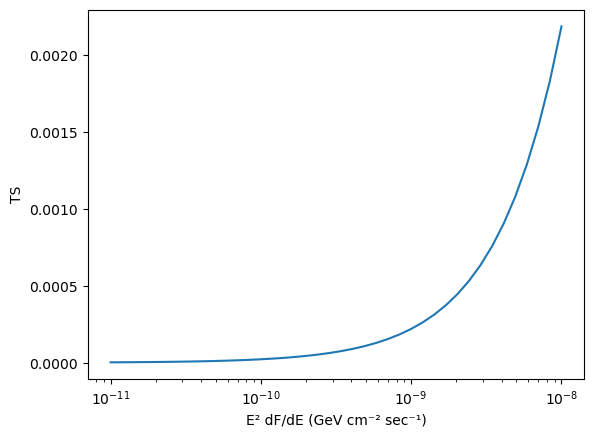

In [137]:
xva=phi0*(10**5)**2
#print(xval)
plt.plot(xva, TS(ns_in, S_i, Bi))
plt.xlabel('E² dF/dE (GeV cm⁻² sec⁻¹)')
plt.xscale('log')
plt.ylabel('TS')
plt.show()



In [130]:
print(phi0)

[1.00000000e-21 1.19377664e-21 1.42510267e-21 1.70125428e-21
 2.03091762e-21 2.42446202e-21 2.89426612e-21 3.45510729e-21
 4.12462638e-21 4.92388263e-21 5.87801607e-21 7.01703829e-21
 8.37677640e-21 1.00000000e-20 1.19377664e-20 1.42510267e-20
 1.70125428e-20 2.03091762e-20 2.42446202e-20 2.89426612e-20
 3.45510729e-20 4.12462638e-20 4.92388263e-20 5.87801607e-20
 7.01703829e-20 8.37677640e-20 1.00000000e-19 1.19377664e-19
 1.42510267e-19 1.70125428e-19 2.03091762e-19 2.42446202e-19
 2.89426612e-19 3.45510729e-19 4.12462638e-19 4.92388263e-19
 5.87801607e-19 7.01703829e-19 8.37677640e-19 1.00000000e-18]
